# Customer Data Pre-Processing

In [1]:
import csv
import json
import random
import pandas as pd
import seaborn as sns

### 1.
###### Question:
Read in the provided ACW Data using the CSV library.

###### Answer:
For this task, I have defined a function called 'open_dataset' which takes a filepath as argument, checks the file extension to ensure that the file is a csv file, then opens the file using a context manager before returning the rows of the csv files in a variable named 'data'.

In [2]:
def open_csv(filepath):
    """
    This function opens a csv file and returns a list containing all 
    rows of data.
    
    parameter
    ---------
    filepath: file path corresponding to the desired csv file.
    
    returns
    --------
    data: a list containing all rows of data present in the csv file.
    """
    #  split filename to in a bid to check file extension 
    split_filepath = filepath.split('.')
    
    #  checking file extension
    if split_filepath[-1] == 'csv':
        try:
            #  create empty list to hold data
            data = []

            #  open file using context manager and append each row to previously defined list
            with open(filepath, mode='r') as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=',')

                for row in csv_reader:
                    data.append(row)

            return data
        
        except Exception as e:
            print(f'Seems something went wrong. See feedback below.\n\nFeedback: {e}')
            pass
    else:
        print('Unsupported file format. Only csv files allowed.')
        pass

In [3]:
#  open customer data
dataset = open_csv('acw_user_data.csv')

In [4]:
#  feedback
print(f"There are {len(dataset)} rows in this dataset.")

There are 1001 rows in this dataset.


### 2.
###### Question:
As a CSV file is an entirely flat file structure, we need to convert our data back into its rich structure. Convert all flat structures into nested structures. These are notably:
* a. Vehicle - consists of make, model, year, and type
* b. Credit Card - consists of start date, end date, number, security code, and IBAN.
* c. Address - consists of the main address, city, and postcode.

For this task, it may be worthwhile inspecting the CSV headers to see which data columns may correspond to these above.
Note: Ensure that the values read in are appropriately cast to their respective types.

###### Answer:
As regards this task, I chose to extract the header row then print the items present in the list using the enumerate function so as to easily observe the index of each attribute. Afterwards, I defined a function named 'nest_all()' which creates a dictionary out of every row bar the header and appends them to a seperate list called data_list. The list data_list is then returned as the csv file in nested form.

Value errors were encountered in the dependants index (index 10) due to the presence of empty strings which cannot be casted to integers. This was handled using a try-except block.

In [5]:
#  extracting the header
header = dataset[0]

In [6]:
#  displaying attributes and their corresponding index
print('Here are the headers of the dataset and their corresponding indices:\n')
for idx, attribute in enumerate(header):
    print(idx, attribute)

Here are the headers of the dataset and their corresponding indices:

0 Address Street
1 Address City
2 Address Postcode
3 Age (Years)
4 Distance Commuted to Work (miles)
5 Employer Company
6 Credit Card Start Date
7 Credit Card Expiry Date
8 Credit Card Number
9 Credit Card CVV
10 Dependants
11 First Name
12 Bank IBAN
13 Last Name
14 Marital Status
15 Yearly Pension (GBP)
16 Retired
17 Yearly Salary (GBP)
18 Sex
19 Vehicle Make
20 Vehicle Model
21 Vehicle Year
22 Vehicle Type


In [7]:
def nest_all(my_data, header=True):
    """
    This function creates a nested structure of all the rows
    derived from a csv file.
    
    parameter
    ---------
    my_data: list containing rows read from a csv file 
    
    returns
    -------
    data_list: a list containing dictionaries representing each row
    """
    #  create a list to hold nested datastructure
    data_list = []
    
    if header:
        csv_data = my_data[1:]
    else:
        csv_data = my_data
    
    #  iterate through rows of data
    for row in csv_data:
        #  empty dictionary to hold attributes per instance
        main_dict = {}
        
        #  create dictionary of vehicle attributes
        vehicle_dict = {}
        vehicle_dict['make'] =  row[19]
        vehicle_dict['model'] =  row[20]
        vehicle_dict['year'] =  row[21]
        vehicle_dict['category'] =  row[22]

        #  create dictionary of credit card attributes
        credit_card_dict = {}
        credit_card_dict['start_date'] = row[6]
        credit_card_dict['end_date'] = row[7]
        credit_card_dict['number'] = int(row[8])
        credit_card_dict['cvv'] = int(row[9])
        credit_card_dict['iban'] = row[12]

        #  create dictionary of address attributes
        address_dict = {}
        address_dict['street'] = row[0]
        address_dict['city'] = row[1]
        address_dict['postcode'] = row[3]

        #  populate dictionary per instance
        main_dict['first_name'] = row[11]
        main_dict['second_name'] = row[13]
        main_dict['age'] = int(row[3])
        main_dict['sex'] = row[18]

        #  casting to boolean
        if row[16] == 'True':
            main_dict['retired'] = True
        else:
            main_dict['retired'] = False

        main_dict['marital_status'] = row[14]

        #  catching exception due to empty strings
        try:
            main_dict['dependants'] = int(row[10])
        except ValueError:
            main_dict['dependants'] = row[10]

        #  populate dictionary per instance
        main_dict['salary'] = float(row[17])
        main_dict['pension'] = float(row[15])
        main_dict['company'] = row[5]
        main_dict['commute_distance'] = float(row[4])
        main_dict['Vehicle'] = vehicle_dict
        main_dict['Credit_Card'] = credit_card_dict
        main_dict['Address'] = address_dict

        #  append to main data list
        data_list.append(main_dict)


    print('All Done!')

    return data_list

In [8]:
#  nesting all attributes
nested = nest_all(dataset)

All Done!


### 3.
###### Question:
The client informs you that they have had difficulty with errors in the dependants column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion from Task 2. These should be changed into something meaningful when encountered.
Print a list where all such error corrections take place.

E.g. Problematic rows for dependants: [16, 58, 80, 98]

###### Answer:
For this task I opted to correct the empty strings in the dependants column using the mode of the distribution. In order to do that all values under the dependent key were extracted using list comprehensions. Thereafter, I filtered the items in my list excluding those that are empty strings.

Since this section of the assignment restricts the usage of external libraries, I wrote a function which derives the highest occuring element in a list (the mode).

In [9]:
#  DERIVE THE MODE
#  extracting values from the dependant column so as to derive the mode for correcting missing values
dependant_values = [x['dependants'] for x in nested]
dependant_values = [int(x) for x in dependant_values if x not in ['', ' ']]

In [10]:
def find_mode(my_list):
    """
    This function derives the value with the highest
    frequency in a list.
    
    parameters
    ----------
    my_list: list of interest
    
    returns
    -------
    modal: value with highest frequency
    """
    #  derive unique values
    uniques = set(my_list)
    #  create dict to hold counts
    count_dict = {}
    
    #  iterate over all unique values
    for value in uniques:
        #  instantiate counter
        count_dict[value] = 0
        #  check each value in list against unique value
        for number in my_list:
            if number==value:
                #  increment counter
                count_dict[value]+=1
            else:
                continue
                
    #  sort count dict by value
    sorted_count = sorted(count_dict.items(), key=lambda x:x[1], reverse=True)
    #  derive modal value
    modal = sorted_count[0][0]
    
    print(f'Modal value: {modal}')
    return modal

In [11]:
#  derive mode
modal_value = find_mode(dependant_values)

Modal value: 2


###### Answer:
With the modal value of the dependants column determined, I then wrote a function which accepts nested data and replaces the empty strings with the mode while also reporting on rows where such corrections were made.

In [12]:
def correct_dependants(my_data, fill_value):
    """
    This function iterates through the rows of a csv file
    identifying rows with missing values in the dependant
    column and fills them with a value of choice
    
    parameters
    ----------
    my_data: list containing dictionaries
    fill_value: value to replace empty stings
    
    returns
    -------
    modified: modified form of the my_data parameter which has been corrected
    """
    #  define list to hold problematic rows
    problematic_rows = []
    modified = my_data.copy()
    
    #  iterate through all rows
    for idx, row in enumerate(modified):
        if row['dependants'] in ['', ' ']:
            row['dependants'] = fill_value
            problematic_rows.append(idx+1)
        else:
            continue
    print(f'All empty strings in dependants fixed using the value {fill_value}!\n')
    print(f'There are {len(problematic_rows)} problematic rows in the CSV. Their indicies are (counting the header):\n{problematic_rows}')
    return modified

In [13]:
#  correct dependant column
corrected_dataset = correct_dependants(nested, modal_value)

All empty strings in dependants fixed using the value 2!

There are 19 problematic rows in the CSV. Their indicies are (counting the header):
[22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


### 4.
###### Question:
Write all records to a processed.json file in the JSON data format. This should be a list of dictionaries, where each index of the list is a dictionary representing a singular person.

###### Answer:
Reading through the assignment prompts, I noticed writing files to json format is a recurring task. For this reason, I chose to write a function for this, one which I will reuse later in the assignment.

In [14]:
def write_to_json(file_name, variable_to_write):
    """
    This function writes a list of dictionaries to json.
    
    parameters
    ----------
    file_name: desired filename
    variable_to_write: list containing dictionaries
    
    returns
    -------
    None
    """
    with open(file_name, mode='w') as json_file:
        json.dump(variable_to_write, json_file)
        print('File saved sucessfully!')
        
    pass

In [15]:
#  write data to json file
write_to_json('processed.json', corrected_dataset)

File saved sucessfully!


### 5.
###### Question:
You should create two additional file outputs, retired.json and employed.json, these should contain all retired customers (as indicated by the retired field in the CSV), and all employed customers respectively (as indicated by the employer field in the CSV) and be in the JSON data format.

##### Answer:
To complete this task, I elected to iterate through each dictionary in the list using list comprehensions, filtering entries where the retired key is true as retired and the converse as employed before eventually writing both to json files.

In [20]:
#  filter data using list comprehensions
retired_entries = [x for x in corrected_dataset if x['retired'] == True]
employed_entries = [x for x in corrected_dataset if x['retired'] == False]

In [36]:
#  feedback
print(f"There are {len(retired_entries)} retired customers")

There are 246 retired customers


In [35]:
#  feedback
print(f"There are {len(employed_entries)} employed customers")

There are 754 employed customers


In [19]:
#  write data to json file
write_to_json('retired.json', retired_entries)

File saved sucessfully!


In [20]:
#  write data to json file
write_to_json('employed.json', employed_entries)

File saved sucessfully!


### 6.
###### Question:
The client states that there may be some issues with credit card entries. Any customers that have more than 10 years between their start and end date need writing to a separate file, called remove_ccard.json, in the JSON data format. The client will manually deal with these later based on your output. They request that you write a function to help perform this, which accepts a single row from the CSV data, and outputs whether the row should be flagged. This can then be used when determining whether to write the current person to the remove_ccard file.

###### Answer:
I wrote a function which takes in a single instance/row, derives the credit card start and end date, then computes the duration between both. This function returns True if the duration is greater than 10 years, while it returns False otherwise.

In [30]:
def remove_ccard(data_instance):
    """
    This function checks the credit card start_date against it's end
    date and returns true if their difference is greater than 10 years
    
    parameter
    ---------
    data_instance: a dictionary containing attributes
    
    returns
    -------
    boolean
    """
    #  extract, process and cast credit card start date to integer
    start_date = data_instance['Credit_Card']['start_date']
    start_date = start_date.split('/')
    start_date = [int(x) for x in start_date]
    start_month = start_date[0]
    start_year = start_date[1]
    
    #  extract, process and cast credit card end date to integer
    end_date = data_instance['Credit_Card']['end_date']
    end_date = end_date.split('/')
    end_date = [int(x) for x in end_date]
    end_month = end_date[0]
    end_year = end_date[1]
    
    #  calculate date
    month = end_month - start_month
    year = end_year - start_year
    
    #  check month to accertain if a full year has been completed
    if month < 0:
        year = year - 1
    else:
        year = year
        
        
    if year > 10:
        return True
    else:
        return False

In [33]:
#  filter out data using list comprehension
remove_credit_card = [x for x in corrected_dataset if remove_ccard(x)]

In [34]:
#  feedback
print(f"There are {len(remove_credit_card)} customers with credit card details slated to be removed.")

There are 193 customers with credit card details slated to be removed.


In [24]:
#  write data to json file
write_to_json('remove_ccard.json', remove_credit_card)

File saved sucessfully!


### 7.
###### Question:
You have been tasked with calculating some additional metrics which will be used for ranking customers. You should create a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json:
* a. Add, and calculate appropriately, this new attribute. It should represent the Salary that a customer earns, per mile of their commute.
    * i. Note: If a person travels 1 or fewer commute miles, then their salary-commute would be just their salary.
* b. Sort these records by that new metric, in ascending order.
* c. Store the output file out as a JSON format, for a commute.json file.

###### Answer:
To complete this task, I wrote a function which takes a json filepath as parameter, reads the json file thereafter modifying it by adding an additional key, salary-commute, and returning the modified list of dictionaries. The list is then sorted by using the salary-commute key as a reference before writing to json.

In [52]:
def calculate_salary_commute(filepath):
    """
    This function computes the ratio of salary to commute_distance
    and creates a new key for each dictionary.
    
    parameter
    ---------
    filepath: desired json file
    
    returns
    -------
    modified_instances: a list containing newly modified dictionaries 
                        with the Salary-Commute key added in.
    """
    #  create list to hold modified data instances
    modified_instances = []
    
    #  open desired file with context manager
    with open(filepath, mode='r') as json_file:
        processed_data = json.load(json_file)
        
        #  iterate through all instsances of data
        for instance in processed_data:
            if instance['commute_distance'] > 1:
                salary_commute = instance['salary'] / instance['commute_distance']
                salary_commute = round(salary_commute, 2)
                instance['Salary-Commute'] = salary_commute
            else:
                #  if commute_distance == 0 then salary-commute == salary
                instance['Salary-Commute'] = instance['salary']
            #  append to master list
            modified_instances.append(instance)
            
    print('All Done!')
            
    return modified_instances

In [53]:
#  add salary-commute key to processed json
modified_data = calculate_salary_commute('processed.json')

All Done!


In [54]:
#  sort modified data by salary-commute value
modified_data_sorted = sorted(modified_data, key=lambda x: x['Salary-Commute'])

In [28]:
#  write sorted data to json file
write_to_json('commute.json', modified_data_sorted)

File saved sucessfully!


### Data Visualisation

### 1
###### Question:
Obtain the Data Series for Salary, and Age, and calculate the following:

#### a
Mean Salary

In [37]:
#  read dataset
customer_data = pd.read_csv('acw_user_data.csv')

In [38]:
#  preview
customer_data.head()

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


In [39]:
#  list columns as some are truncated from view
for column in customer_data.columns:
    print(column)

Address Street
Address City
Address Postcode
Age (Years)
Distance Commuted to Work (miles)
Employer Company
Credit Card Start Date
Credit Card Expiry Date
Credit Card Number
Credit Card CVV
Dependants
First Name
Bank IBAN
Last Name
Marital Status
Yearly Pension (GBP)
Retired
Yearly Salary (GBP)
Sex
Vehicle Make
Vehicle Model
Vehicle Year
Vehicle Type


In [40]:
#  deriving salary series
salary_series = customer_data['Yearly Salary (GBP)']

In [57]:
#  preview
salary_series.head()

0    72838
1    54016
2    68049
3    91337
4    18446
Name: Yearly Salary (GBP), dtype: int64

In [41]:
#  calculating the mean salary
print(f"The mean salary is {salary_series.mean():.2f}")

The mean salary is 57814.08


#### b
Median Age

In [42]:
#  deriving age series
age_series = customer_data['Age (Years)']

In [58]:
#  preview
age_series.head()

0    89
1    46
2    22
3    56
4    57
Name: Age (Years), dtype: int64

In [43]:
#  calculating the median age
print(f"The median age is {age_series.median()}")

The median age is 54.0


### 2
###### Question:
Perform univariate plots of the following data attributes:

#### a
Age, calculating how many bins would be required for a bin_width of 5.

###### Answer:
To calculate the number of bins, the range of the distribution (max_value - min_value) is computed then divided by the desired bin width. The result obtained is then rounded to a whole number.

In [44]:
#  CALCULATE NUMBER OF BINS
#  minimum age
min_age = customer_data['Age (Years)'].min()
#  maximum age
max_age = customer_data['Age (Years)'].max()
#  bin width
bin_width = 5

#  required bins
required_bins = (max_age - min_age)/bin_width
required_bins = round(required_bins)

In [45]:
#  feedback
print(f'Required number of bins for a bin width of 5: {required_bins}')

Required number of bins for a bin width of 5: 15


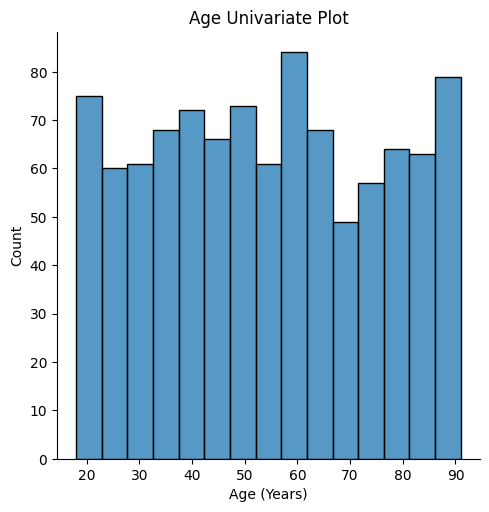

In [46]:
#  plot
age_univariate_bin15 = sns.displot(data=customer_data, x='Age (Years)', bins=required_bins)

age_univariate_bin15.set(title='Age Univariate Plot')

#### b
###### Question:
Dependents, fixing data errors with seaborn itself.

###### Answer:
Missing values in the dependant column are filled with the median value of the distirbution using the pandas fillna() method. The univariate plot of the dependant column is then derived.

In [39]:
#  check the number of missing values in the dependants column
print(f"There are {sum(customer_data['Dependants'].isnull())} missing values in the dependants column.")

There are 19 missing values in the dependants column.


In [40]:
#  derive median value in dependant column
dependant_median = customer_data['Dependants'].median()

In [41]:
#  fill missing values in the dependant column with the median value
customer_data['Dependants'].fillna(dependant_median, inplace=True)

In [42]:
#  check to acertain that there are no more missing values in the dependants column
print(f"There are {sum(customer_data['Dependants'].isnull())} missing values in the dependants column.")

There are 0 missing values in the dependants column.


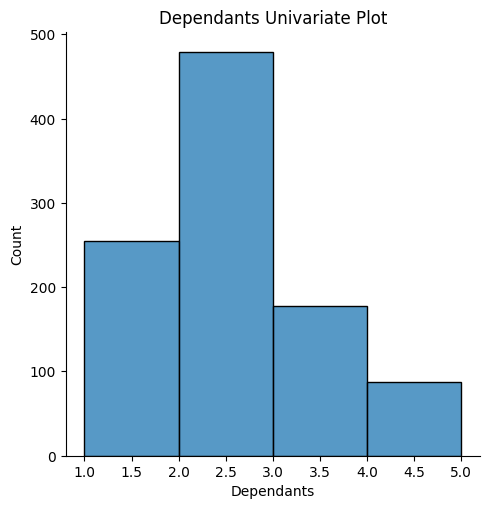

In [43]:
#  plot
dependant_univariate = sns.displot(data=customer_data, x='Dependants', bins=4)

dependant_univariate.set(title='Dependants Univariate Plot')

#### c
###### Question:
Age (of default bins), conditioned on Marital Status.

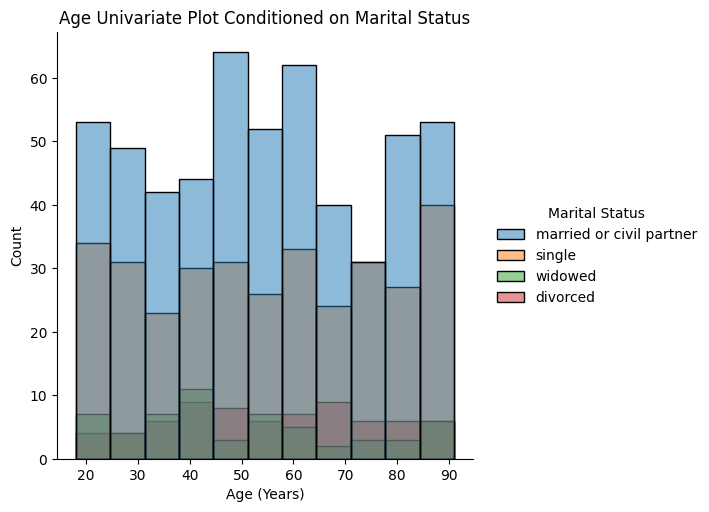

In [44]:
#  plot
age_univariate_hue = sns.displot(data=customer_data, x='Age (Years)', hue='Marital Status')

age_univariate_hue.set(title='Age Univariate Plot Conditioned on Marital Status')

### 3
###### Question:
Perform multivariate plots with the following data attributes:

#### a
Commuted distance against salary.

[Text(0.5, 1.0, 'Commute vs Salary')]

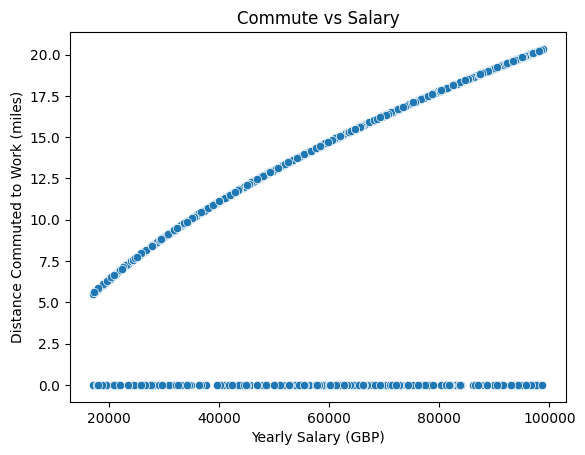

In [45]:
#  plot
commute_salary_scatterplot = sns.scatterplot(data=customer_data, x='Yearly Salary (GBP)', y='Distance Commuted to Work (miles)')

commute_salary_scatterplot.set(title='Commute vs Salary')

#### b
Age against Salary.

[Text(0.5, 1.0, 'Age vs Salary')]

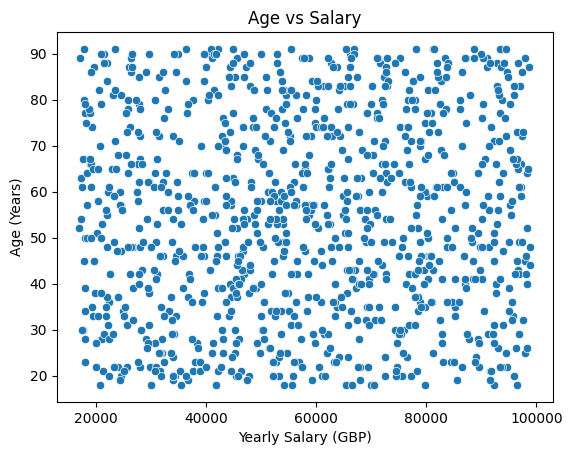

In [46]:
#  plot
salary_age_scatterplot = sns.scatterplot(data=customer_data, x='Yearly Salary (GBP)', y='Age (Years)')

salary_age_scatterplot.set(title='Age vs Salary')

#### c
Age against salary conditioned by dependants.

[Text(0.5, 1.0, 'Age vs Salary Conditioned on Dependants')]

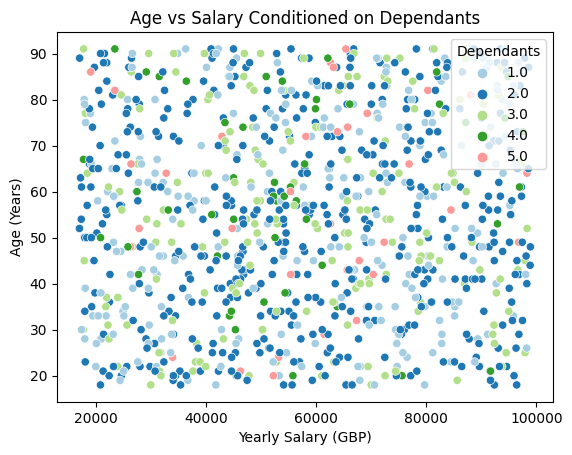

In [47]:
#  plot
salary_age_scatterplot_hue = sns.scatterplot(data=customer_data, x='Yearly Salary (GBP)', 
                                             y='Age (Years)', hue='Dependants', palette='Paired')

salary_age_scatterplot_hue.set(title='Age vs Salary Conditioned on Dependants')

### 4
###### Question:
Your client would like the ability to save the plots which you have produced. Provide a Notebook cell which can do this.

###### Answer:
The function below is written to help to save plots made in this notebook. The function ensures that when a file extension is supplied in the filename, it is one which is suitable for image files.

In [48]:
def save_plot(plot, filename):
    """
    This function saves generated plots to file
    
    parameters
    ----------
    plot: variable holding plot object
    filename: desired filename to save plot
    
    returns
    -------
    None
    """
    #  split filename in order to check suitability or presence of file extension
    split_filename = filename.split('.')
    
    #  check presence of file extension
    if len(split_filename) == 1:
        try:
            #  save figure
            plot.savefig(filename)
            print('Plot saved succesfully!')
        except AttributeError:
            #  save figure
            plot.figure.savefig(filename)
            print('Plot saved succesfully!')
    
    else:    
        #  check suitability of file extension
        file_extension = split_filename[-1]

        if file_extension not in ['jpg', 'jpeg', 'tif', 'png']:
            print('Plot not saved!')
            print("Unsupported file extension. Please use one of either 'jpg', 'jpeg', 'tif' or 'png'.")
        else:
            try:
                #  save figure
                plot.savefig(filename)
                print('Plot saved succesfully!')
            except AttributeError:
                #  save figure
                plot.figure.savefig(filename)
                print('Plot saved succesfully!')
    pass

In [49]:
#  saving plots
save_plot(age_univariate_bin15, 'age_univariate_bin15.png')
save_plot(dependant_univariate, 'dependant_univariate.png')
save_plot(age_univariate_hue, 'age_univariate_hue.png')
save_plot(commute_salary_scatterplot, 'commute_salary_scatterplot.png')
save_plot(salary_age_scatterplot, 'salary_age_scatterplot.png')
save_plot(salary_age_scatterplot_hue, 'salary_age_scatterplot_hue.png')

Plot saved succesfully!
Plot saved succesfully!
Plot saved succesfully!
Plot saved succesfully!
Plot saved succesfully!
Plot saved succesfully!
